<a href="https://colab.research.google.com/github/varsh19/scRNAseq-Analysis-of-PBMC/blob/main/scRNAseq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Single-cell RNA-Seq Analysis of PBMC Dataset from 10x Genomics**

## Dataset being used

PBMC (Peripheral Blood Mononuclear Cells) are a type of blood cell that is critical to the immune system. This group consists of lymphocytes (such as T cells, B cells, and NK cells) and monocytes, and sometimes include dendritic cells. PBMCs are used extensively in research to study immune responses and various diseases, including infections, cancer, and autoimmune disorders.

In single-cell RNAseq studies, PBMCs are often analyzed to identify different cell types and states, study their gene expression profiles, and understand their roles in immune responses. The PBMC datasets, like this one from 10x Genomics (pbmc3k), are commonly used as benchmarks and for developing and testing computational methods in scRNA-seq analysis.

## Installing Required Modules

In [ ]:
!pip install scanpy
!pip install igraph
!pip install louvain

## Importing Required Libraries

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing

In [ ]:
# Loading PBMC dataset from 10x Genomics
adata = sc.datasets.pbmc3k()

# Basic QC filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# Calculating the percentage of mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# Filtering based on QC metrics
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

# Normalizing
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Identifying highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


## Dimensionality Reduction

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


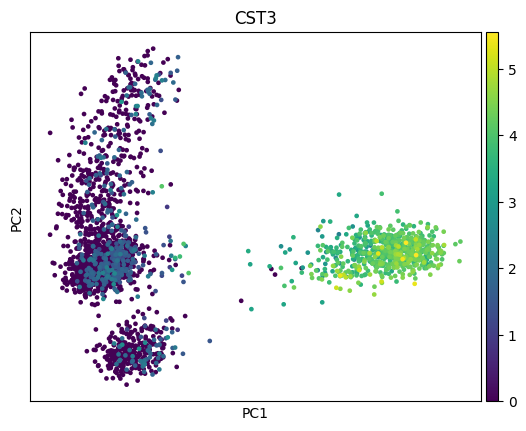

In [ ]:
# Performing PCA
sc.tl.pca(adata, svd_solver='arpack')

# Visualizing the first two principal components
sc.pl.pca(adata, color='CST3')

## Clustering

## Clustering

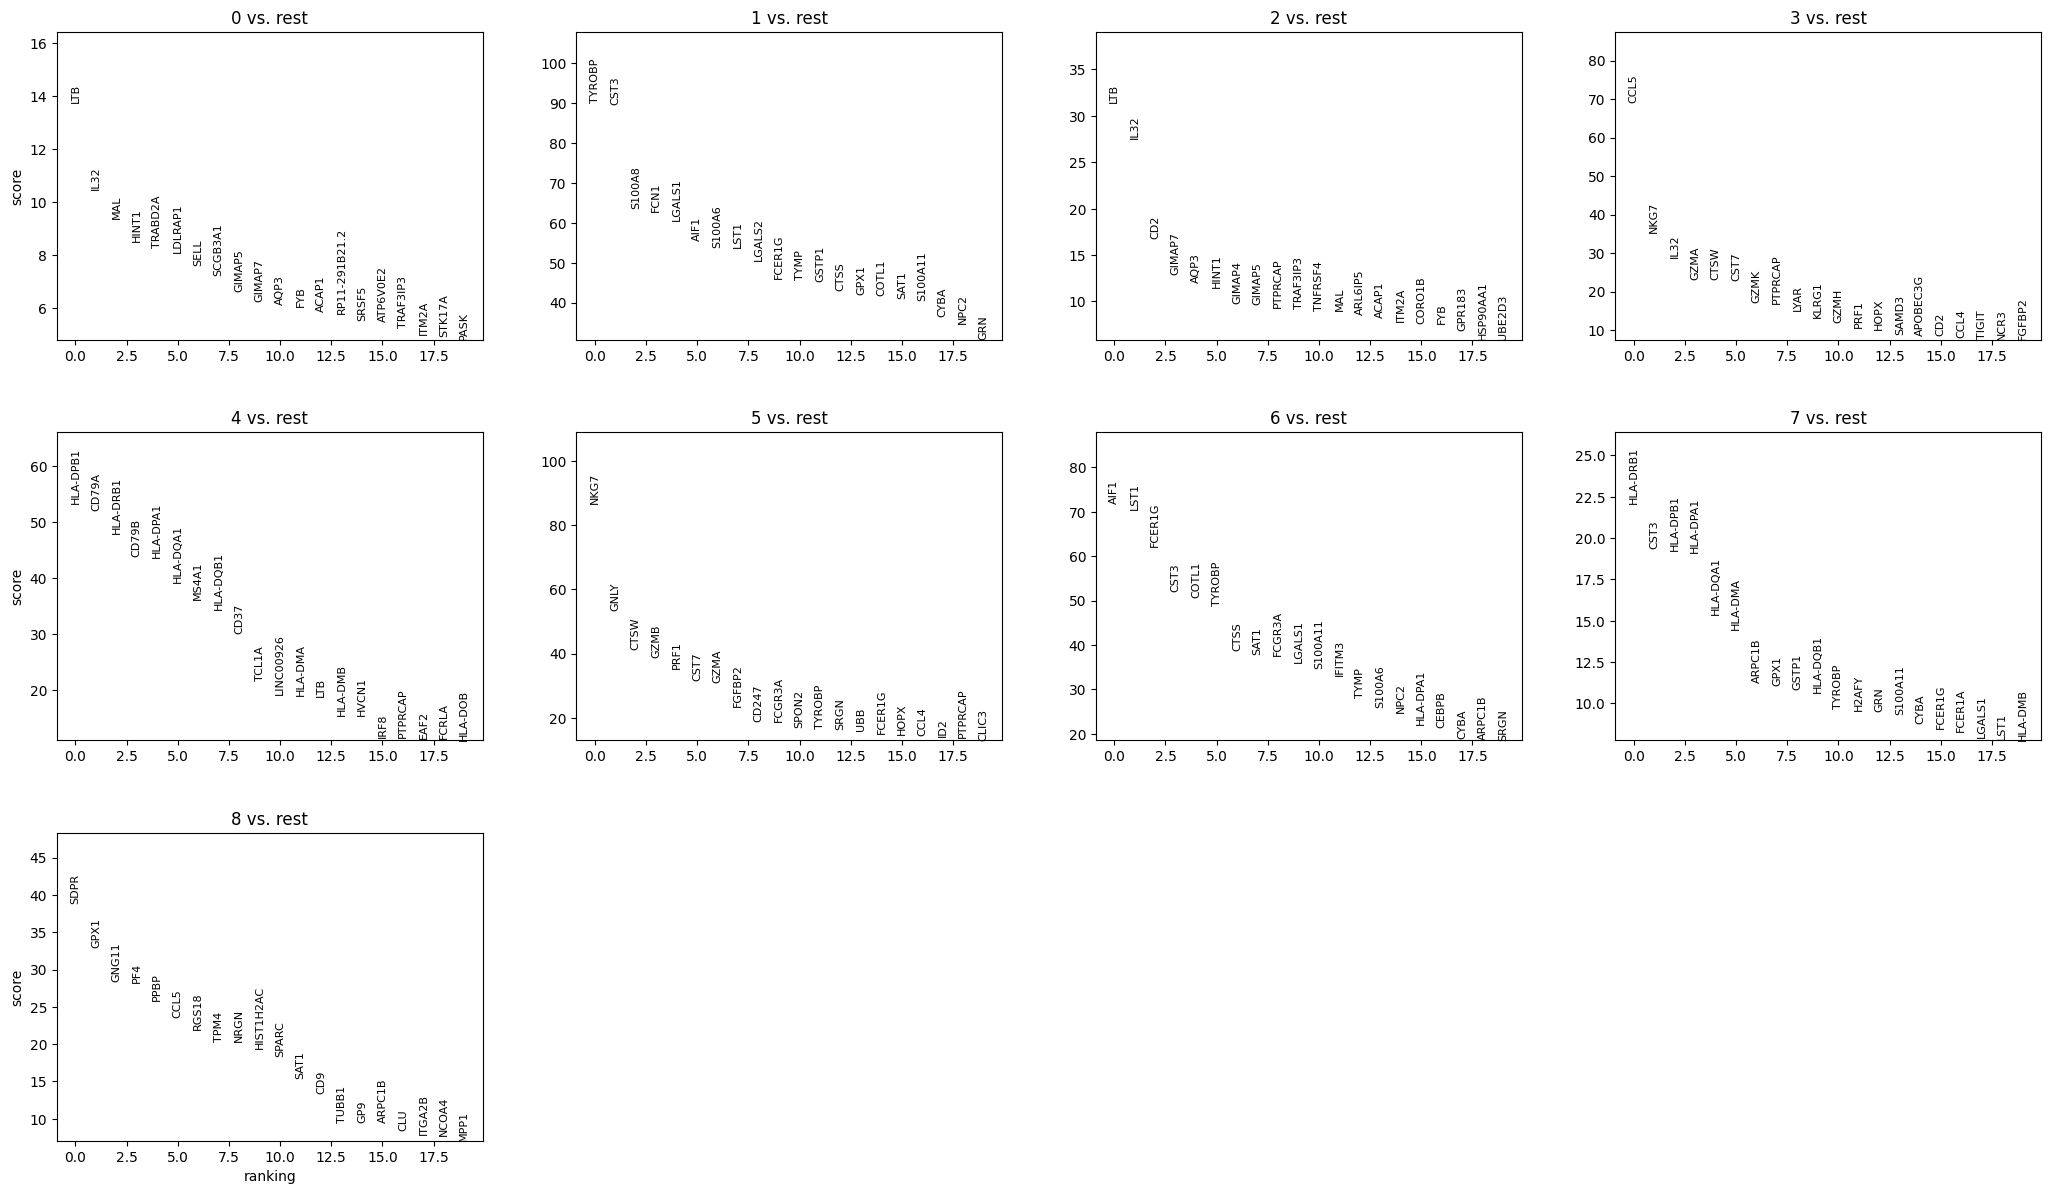

In [ ]:
# Identifying marker genes for each cluster
sc.tl.rank_genes_groups(adata, 'louvain', method='t-test')

# Visualizing top marker genes
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

## Cell Type Annotation

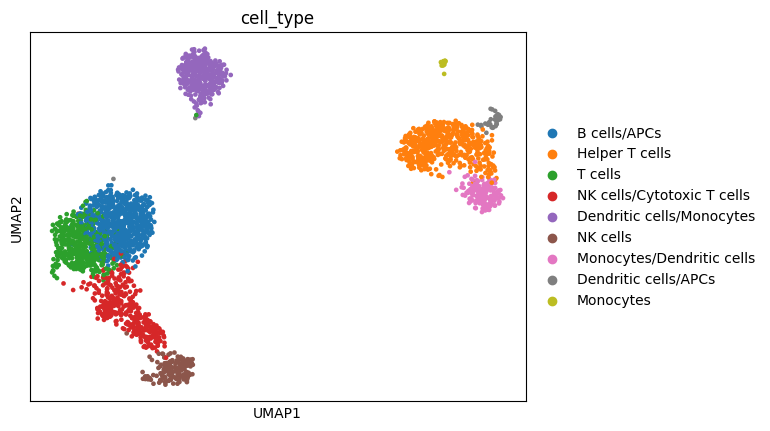

In [ ]:
cluster_annotation = {
    '0': 'B cells/APCs',
    '1': 'Helper T cells',
    '2': 'T cells',
    '3': 'NK cells/Cytotoxic T cells',
    '4': 'Dendritic cells/Monocytes',
    '5': 'NK cells',
    '6': 'Monocytes/Dendritic cells',
    '7': 'Dendritic cells/APCs',
    '8': 'Monocytes'
}

# Adding the annotation to the adata object
adata.obs['cell_type'] = adata.obs['louvain'].map(cluster_annotation).astype('category')

# Visualizing the annotated clusters using UMAP
sc.pl.umap(adata, color=['cell_type'])

## Differential Expression Analysis

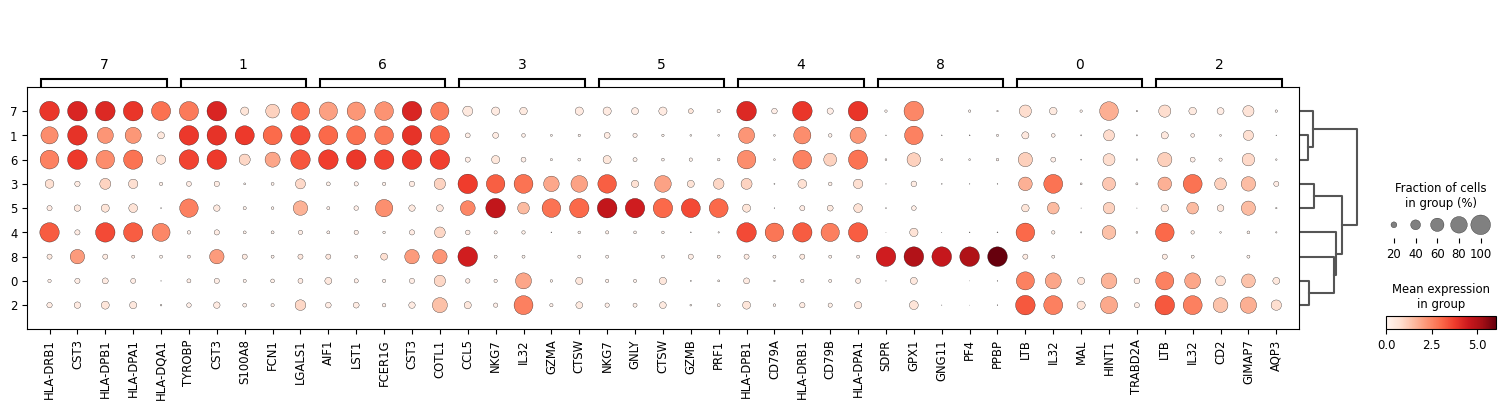

In [ ]:
# Performing differential expression analysis between clusters
sc.tl.rank_genes_groups(adata, 'louvain', method='t-test')

# Visualizing the results
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5)